# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hanik Muzdalifah
- **Email:** hanikmuzdalifah@gmail.com
- **ID Dicoding:** hanikmzd

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apa kategori produk yang paling banyak terjual?
- Pertanyaan 2: Bagaimana tren penjualan dari data E-Commerce tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'google'

## Data Wrangling

### Gathering Data

**Data Order Item**

In [104]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Course/Data Scientist/E-Commerce Public Dataset/order_items_dataset.csv'

data_order_item = pd.read_csv(file_path)

data_order_item.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
data_order_item.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


**Data Products**

In [80]:
file_path = '/content/drive/My Drive/Course/Data Scientist/E-Commerce Public Dataset/products_dataset.csv'

data_products = pd.read_csv(file_path)

data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [27]:
data_products.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


**Insight:**
- Data order items terdiri dari 7 kolom
- Macam-macam tipe data pada data order items yaitu:
  1. objek: order_id, product_id, seller_id, shipping_limit_date
  2. integer: order_item_id
  3. float: price, freight_value
- Data products terdiri dari 9 kolom
- Macam-macam tipe data pada data products yaitu:
  1. objek: product_id, product_category_name
  2. float: product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

### Assessing Data

In [28]:
#assessing data order item
data_order_item.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [29]:
data_order_item.duplicated().sum()

0

In [30]:
data_order_item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


**Insight:**
- Tidak ada missing value dalam data order item
- Tidak ada duplicate value dalam data order item

In [31]:
#assessing data products
data_products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [32]:
data_products.duplicated().sum()

0

In [33]:
data_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Tidak ada duplicate value dalam data products
- Terdapat missing value dalam products dengan masing masing 610 pada product_category_name, product_name_lenght, product_description_lenght, product_photos_qty dan masing masing 2 pada product_weight_g, product_length_cm, product_height_cm, product_width_cm

### Cleaning Data

**Menangani kesalahan Type Data Pada Data Order Item**

In [61]:
# Konversi kolom 'shipping_limit_date' ke tipe datetime
data_order_item['shipping_limit_date'] = pd.to_datetime(data_order_item['shipping_limit_date'])

# Ekstrak tahun dan bulan dari 'shipping_limit_date'
data_order_item['year_month'] = data_order_item['shipping_limit_date'].dt.to_period('M')

data_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
 7   year_month           112650 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), period[M](1)
memory usage: 6.9+ MB


**Menangani Missing value pada Data Product**

In [35]:
#Mengetahui missing value
data_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [36]:
#Melihat missing value product_category_name pada data_products
data_products[data_products.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [37]:
#Drop missing value product_category_name karena datanya tidak memungkinkan
data_products.drop(data_products[data_products.product_category_name.isna()].index, inplace=True)

In [38]:
#Melihat kembali missing value
data_products.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,1
product_length_cm,1
product_height_cm,1
product_width_cm,1


In [39]:
#Melihat missing value product_weight_g  dataframe_products
#Membiarkan missing value product_weight_g product_length_cm	product_height_cm	product_width_cm karena hanya akan mengambil nilai dari product_category_name saja
data_products[data_products.product_weight_g .isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

### Explore Data Products

In [65]:
data_order_item.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,year_month
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650
unique,98666,NaN,32951,3095,NaN,NaN,NaN,26
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,2018-08
freq,21,NaN,527,2033,NaN,NaN,NaN,8815
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,NaN
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,NaN
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,NaN
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,NaN
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN


In [66]:
# Mengkelompokan data bersadarkan year_month dengan jumlah order id
data_order_item = data_order_item.groupby('year_month')['order_item_id'].count().reset_index()
data_order_item.sort_values(by='order_item_id',ascending=False)

,year_month,order_item_id
22,2018-08,8815
19,2018-05,8765
17,2018-03,8759
14,2017-12,7726
18,2018-04,7637
15,2018-01,7492
16,2018-02,7375
13,2017-11,7355
20,2018-06,6897
21,2018-07,6672


In [60]:
data_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [52]:
# Mengkelompokan data bersadarkan year_month dengan jumlah price
data_order_item = data_order_item.groupby('year_month')['price'].sum().reset_index()
data_order_item.sort_values(by='price',ascending=False)

,year_month,price
19,2018-05,1084358.55
22,2018-08,1072147.70
17,2018-03,1030527.84
18,2018-04,958729.70
14,2017-12,898920.98
13,2017-11,883351.63
20,2018-06,870736.84
15,2018-01,845279.18
16,2018-02,819228.85
21,2018-07,811132.08


**Explore Data Products**

In [83]:
data_products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Merge Data Order Item dan Products**

In [106]:
#menggabungkan data order item dan products
data_order_products = pd.merge(
    left=data_order_item,
    right=data_products,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
data_order_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


**Explore Data Order Products**

In [85]:
data_order_products.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,111047,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,NaN,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,NaN,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000


In [89]:
# Mengkelompokan data bersadarkan kategori produk dengan jumlah penjualan tertinggi
data_order_products = data_order_products.groupby('product_category_name')['order_item_id'].sum().reset_index()
data_order_products.sort_values(by='order_item_id',ascending=False)

,product_category_name,order_item_id
13,cama_mesa_banho,13665
54,moveis_decoracao,11540
11,beleza_saude,11081
32,esporte_lazer,9932
44,informatica_acessorios,9874
...,...,...
65,portateis_cozinha_e_preparadores_de_alimentos,16
46,la_cuisine,16
60,pc_gamer,11
37,fashion_roupa_infanto_juvenil,8


**Insight:**
- Total order adalah sebanyak 98.666 order
- Jenis produk yang terjual sebanyak 32.951 jenis
- Penjual yang terlibat dalam penjualan adalah sebanyak 3.095 penjual
- Orderan terbanyak ada pada bulan Maret tahun 2018 dengan orderan sebanyak 8.815 orderan
- Total sales tertinggi pada pada bulan Mei tahun 2018 sebanyak 1.084.358,55
- Total sales tertinggi terdapat pada order id 0812eb902a67711a1cb742b3cdaa65ae yaitu sebanyak 6.735
- Terdaoat sebanyak 73 kategori produk yang dijual
- Produk yang paling banyak dibeli adalah kategori cama_mesa_banho dengan penjualan sebanyak 13.665 item.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

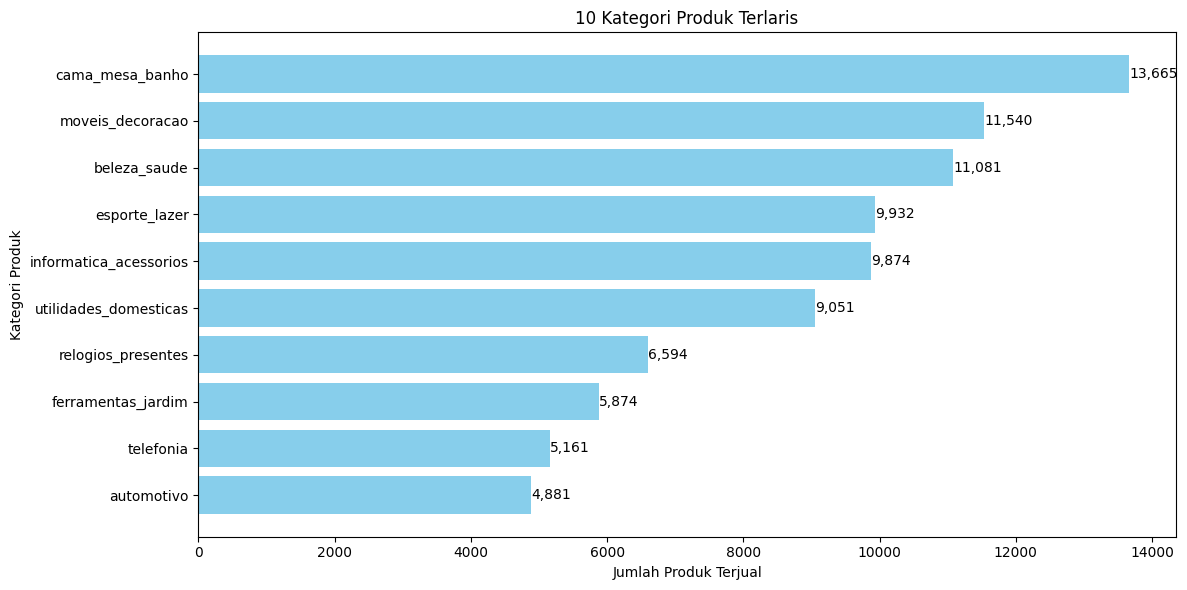

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

top_10_products = data_order_products.head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_products['product_category_name'], top_10_products['order_item_id'], color='skyblue')
plt.xlabel('Jumlah Produk Terjual')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk Terlaris')

# Menambahkan angka pada ujung bar
for bar, value in zip(bars, top_10_products['order_item_id']):
    plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:,}', va='center', ha='left')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Insight:**
- Kategori produk dengan penjualan tertinggi yaitu pada cama_mesa_banho
- Kategori produk dengan penjualan tertinggi terjual sebanyak 13.665 item

### Pertanyaan 2:

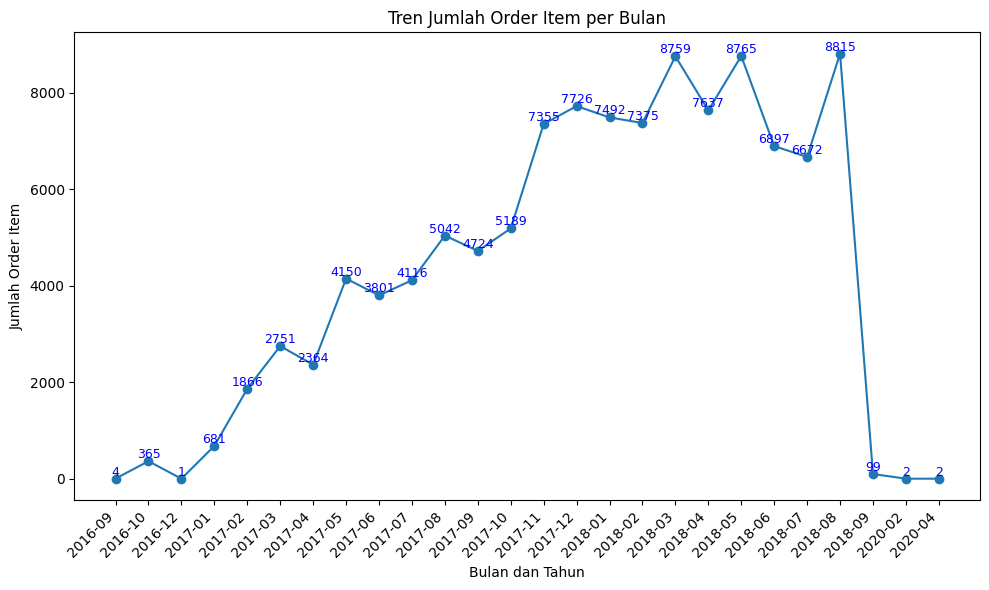

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom 'shipping_limit_date' ke tipe datetime
data_order_products['shipping_limit_date'] = pd.to_datetime(data_order_products['shipping_limit_date'])

# Ekstrak tahun dan bulan
data_order_products['year_month'] = data_order_products['shipping_limit_date'].dt.to_period('M')

# Group data berdasarkan 'year_month' dan hitung jumlah order item
order_trend = data_order_products.groupby('year_month')['order_item_id'].count().reset_index()
order_trend.columns = ['year_month', 'order_count']

# Urutkan berdasarkan 'year_month'
order_trend = order_trend.sort_values(by='year_month')

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(order_trend['year_month'].astype(str), order_trend['order_count'], marker='o')  # Gunakan 'order_count'

# Tambahkan angka pada setiap titik
for i in range(len(order_trend)):
    plt.text(
        x=order_trend['year_month'].astype(str).iloc[i],
        y=order_trend['order_count'].iloc[i],
        s=str(order_trend['order_count'].iloc[i]),
        ha='center',
        va='bottom',
        fontsize=9,
        color='blue'
    )

# Label dan judul
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Jumlah Order Item')
plt.title('Tren Jumlah Order Item per Bulan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

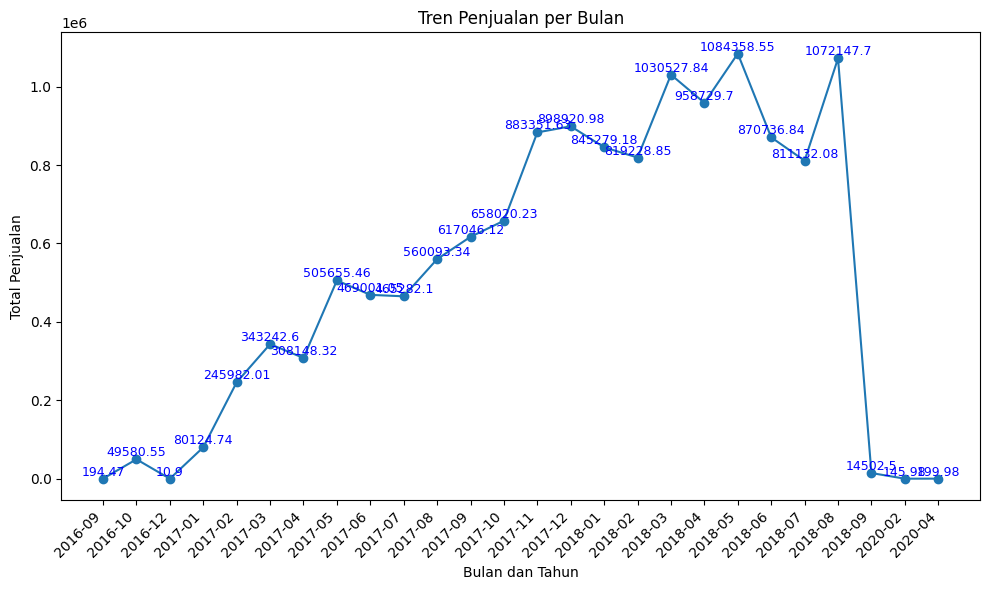

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kolom 'shipping_limit_date' ke tipe datetime
data_order_products['shipping_limit_date'] = pd.to_datetime(data_order_products['shipping_limit_date'])

# Ekstrak tahun dan bulan
data_order_products['year_month'] = data_order_products['shipping_limit_date'].dt.to_period('M')

# Group data berdasarkan 'year_month' dan hitung jumlah order item
order_trend = data_order_products.groupby('year_month')['price'].sum().reset_index()
order_trend.columns = ['year_month', 'order_sum']

# Urutkan berdasarkan 'year_month'
order_trend = order_trend.sort_values(by='year_month')

# Plot data
plt.figure(figsize=(10, 6))
plt.plot(order_trend['year_month'].astype(str), order_trend['order_sum'], marker='o')

# Tambahkan angka pada setiap titik
for i in range(len(order_trend)):
    plt.text(
        x=order_trend['year_month'].astype(str).iloc[i],
        y=order_trend['order_sum'].iloc[i],
        s=str(order_trend['order_sum'].iloc[i]),
        ha='center',
        va='bottom',
        fontsize=9,
        color='blue'
    )

# Label dan judul
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Total Penjualan')
plt.title('Tren Penjualan per Bulan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Total item yang terjual dengan jumlah tertinggi ada pada bulan Agustus Tahun 2018 dengan total sebanyak 8.815 item
- Total nilai penjualan tertinggi ada pada bulan Mei Tahun 2018 dengan total penjualan sebanyak 1.084.350,55
- Terjadi penurunan drastis pada bulan September 2018

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan analisis yang dilakukan, 10 kategori produk yang banyak terjual adalah:
  1. cama_mesa_banho
  2. moveis_decoracao
  3. beleza_saude
  4. esporte_lazer
  5. informatica_acessorios
  6. utilidades_domesticas
  7. relogios_presentes
  8. ferramentas_jardim
  9. telofonia
  10. automotivo
Kategori produk dengan penjualan terbanyak adalah cama_mesa_banho yaitu sebanyak 8.815 item

- Berdasarkan hasil analisis, terlihat adanya pertumbuhan nilai penjualan yang signifikan dari Bulan September 2016 hingga mencapai puncaknya pada Bulan Mei 2018 dengan total penjualan tetinggi pada Bulan Mei 2018 yaitu sebanyak 1.084.350,55. Berbeda dengan total nilai penjualan, berdasarkan jumlah item yang terjual terdapat petumbuhan penjualan item yang signifikan hingga Bulan Agustus 2018. Periode ini menunjukkan keberhasilan strategi bisnis atau tingginya permintaan pasar yang konsisten. Namun, terjadi penurunan bertahap pada nilai penjualan hingga penurunan drastis pada nilai dan jumlah item yang tejual di Bulan September 2018. Penurunan ini dapat disebabkan oleh perubahan tren konsumen, meningkatnya persaingan, atau faktor eksternal seperti perlambatan ekonomi. Hal ini menyoroti pentingnya menjaga inovasi, memantau kebutuhan pasar, dan menjalankan strategi pemasaran yang adaptif untuk mengatasi penurunan dan memaksimalkan peluang pertumbuhan di masa mendatang.